# **Linear Discriminant Analysis (LDA) for Dimensionality Reduction**

## **Introduction**

>**Overview of Dimensionality Reduction:**

Dimensionality reduction is a method that helps lower the number of features in a dataset without losing its crucial information. It proves particularly beneficial when dealing with high-dimensional data, where the number of features is more significant than the number of samples. The primary objectives of dimensionality reduction


*   ***Simplify:*** Reduce the complexity of the dataset.
* ***Visualization:*** Simplify visualization of high-dimensional data.
* ***Computation:*** Reduce computational cost in algorithms.
* ***Noise Reduction:*** Remove redundant and noisy features.





> **Linear Discriminant Analysis (LDA):**


Linear Discriminant Analysis (LDA) is a widely used supervised learning technique for classification tasks that involves dimensionality reduction. Its primary goal is to determine a linear combination of features that can best distinguish between multiple classes in the dataset. The following are some key points to consider about LDA: -


1.   ***Objective:*** The goal is to increase the separability between classes while reducing the variance within each class.
2.  ***Assumptions:*** It assumes that the data is normally distributed and that the classes share identical covariance matrices.
3.  ***Linear Discriminants:*** LDA calculates linear discriminants that can be utilized to project the data onto a lower-dimensional space.
4.  ***Fisher's Criterion:*** LDA is based on Fisher's criterion, which aims to maximize the ratio of between-class scatter to within-class scatter.
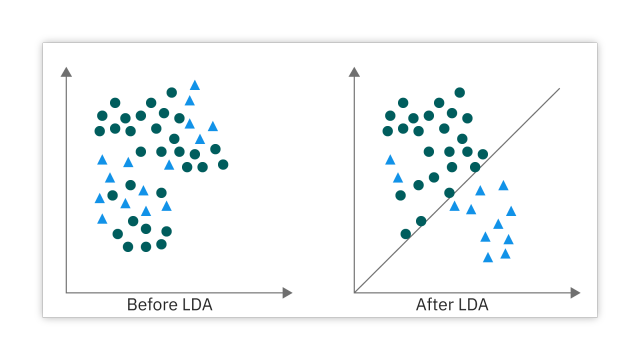

*Source:* [*https://www.ibm.com/topics/linear-discriminant-analysis*](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/f1/55/applying-linear-discriminant-analysis-lda-to-a-data-cluster.component.complex-narrative-m.ts=1709559427671.png/content/adobe-cms/us/en/topics/linear-discriminant-analysis/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative/items/content_group/image)


> **1. Objective Function of LDA:**



The objective of LDA is to maximize the ratio of between-class scatter ($S_B$) to within-class scatter ($S_W$). This is achieved by finding the projection that maximizes the Fisher's criterion, given by:
$$J(w) = \frac{w^T S_B w}{w^T S_W w}$$





>**2. Assumptions underlying LDA:**


*   ***Data is normally distributed:*** LDA assumes that the data within each class is normally distributed.
*   ***Classes have identical covariance matrices:*** It assumes that all classes have the same covariance matrix.
*   ***Features are statistically independent:*** LDA assumes that features are statistically independent within each class.

> **3. Concept of Linear Discriminants:**

* Linear discriminants are the axes along which the data is projected to maximize class separability.
* The number of linear discriminants is equal to the number of classes minus one.

***Relationship between Features and Discriminants:***

* The linear discriminants are linear combinations of the original features, represented as $LD = w^T X$, where $w$ is the weight vector.



> **4. Fisher's Linear Discriminant:***

***Derivation of Fisher's Linear Discriminant:***

* Fisher's Linear Discriminant seeks to maximize the ratio of between-class scatter to within-class scatter, leading to the eigenvalue problem:
$$
S_W^{-1} S_B w = \lambda w
$$

***Relationship between Fisher's Linear Discriminant and the Objective Function:***
* The objective function of LDA ($J(w)$) is directly related to Fisher's Linear Discriminant. Maximizing $J(w)$ is equivalent to finding the eigenvectors corresponding to the largest eigenvalues of the generalized eigenvalue problem.

## **Implementation of LDA on Iris dataset in Python**

### **Iris Dataset Overview**

The Iris dataset is a classic dataset in machine learning and statistics, consisting of measurements of various iris flowers' sepal and petal lengths and widths. It contains 150 samples, each belonging to one of three species of iris flowers: setosa, versicolor, and virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width.

The goal of the dataset is to classify iris flowers into their respective species based on these measurements. However, with four features, visualizing and analyzing the data can be challenging due to its high dimensionality.

### **Data Preparation**

Install and import relevant libraries



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Read and load the data

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define column names
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read the data set
dataset = pd.read_csv(url, names=cls)

Preprocess the data

In [17]:
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

### **Perform exploratory data analysis**

pair plots

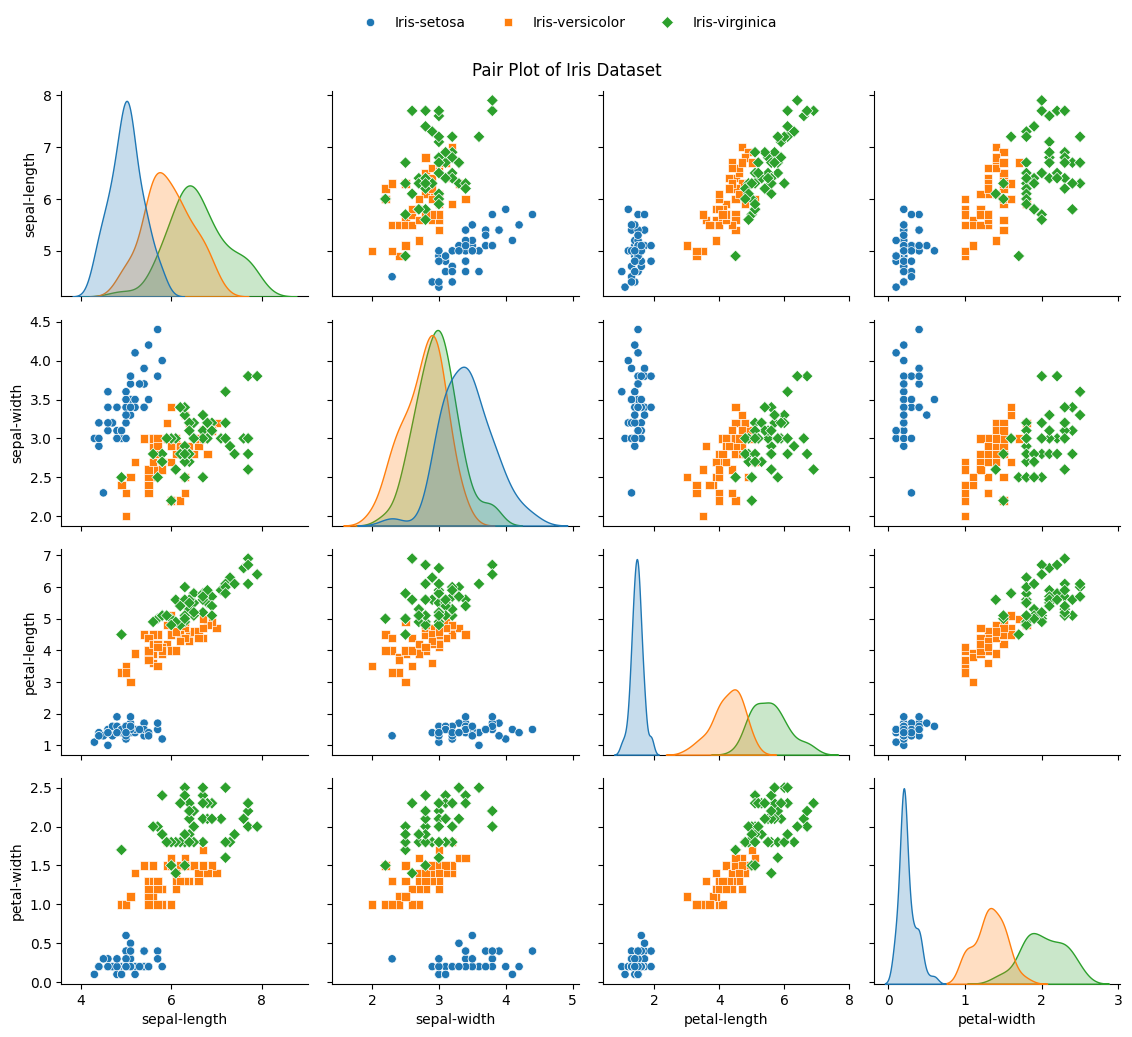

In [18]:
# Create a pair plot to visualize relationships between different features and species.
ax = sns.pairplot(dataset, hue='Class', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

histograms

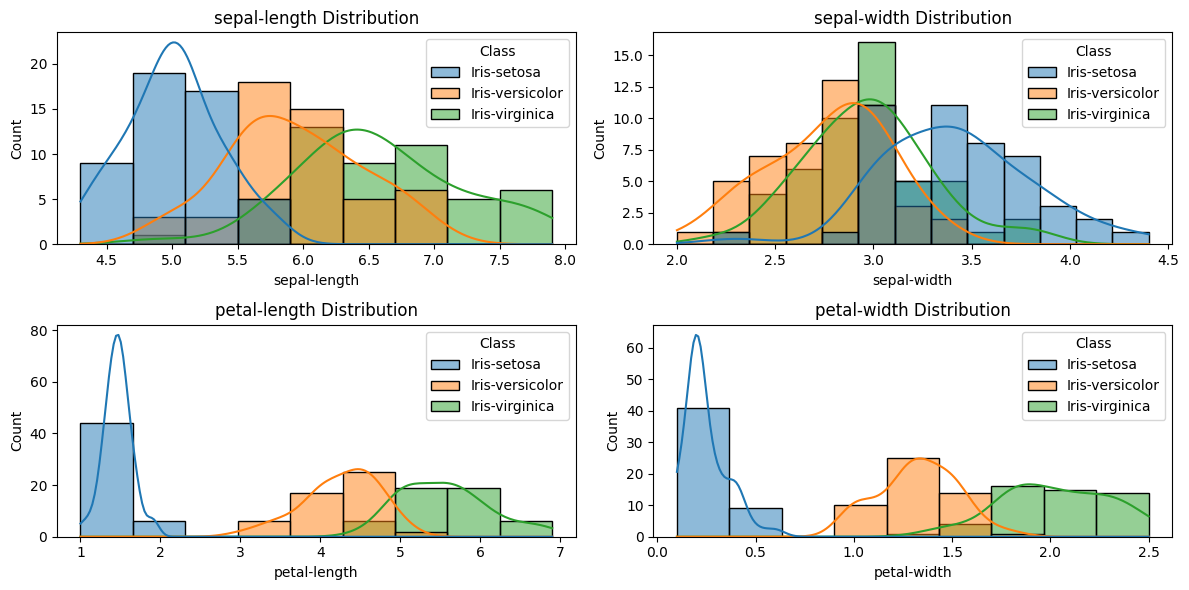

In [19]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 6))
for i, feature in enumerate(cls[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=dataset, x=feature, hue='Class', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

correlation heatmaps

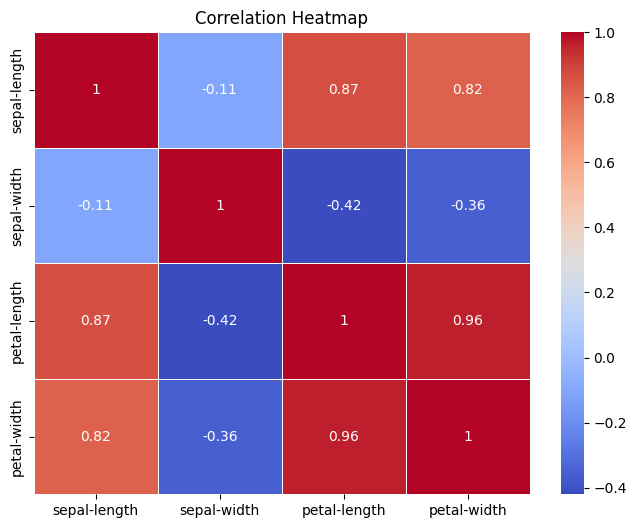

In [20]:
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Split the data set

In [21]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **Choice of Linear Discriminant Analysis (LDA)**

Given the high dimensionality of the Iris dataset, dimensionality reduction techniques become crucial for simplifying visualization, reducing computational complexity, and potentially improving classification performance.

Linear Discriminant Analysis (LDA) is chosen as the dimensionality reduction technique for several reasons:

* ***Supervised Learning:*** LDA is a supervised technique that uses class labels for dimensionality reduction and is useful for classifying iris species in the Iris dataset.
* ***Maximizing Class Separability:*** LDA reduces dimensionality while maximizing separability between classes, improving classification performance.
* ***Assumptions Alignment:*** The assumptions underlying LDA, such as normality of data distribution and equality of covariance matrices across classes, align well with the characteristics of the Iris dataset.

We aim to use LDA on the Iris dataset to obtain a simplified representation that retains essential information and may improve classification performance.



### **Applying LDA**

Implement LDA

In [22]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### **Visualization**

Visualize the data

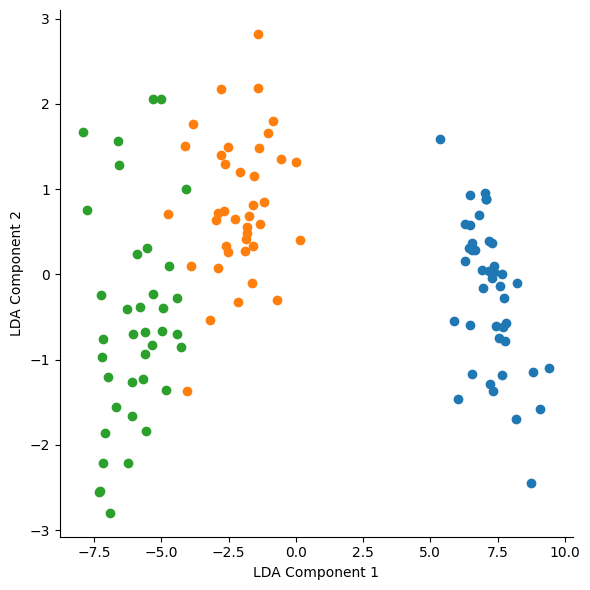

In [23]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_train

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')


Classify the data with random forest

In [24]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### **Interpretation**

> **Evaluation Metrics**


Confusion Matrix

1.   **Confusion Matrix**

The confusion matrix reveals valuable insights into the performance of our Linear Discriminant Analysis (LDA) model on the Iris dataset. It provides a breakdown of correct and incorrect predictions made by the model for each class. Specifically:

* ***True Positives (TP):*** The number of instances correctly classified as belonging to a particular class.
* ***True Negatives (TN):*** The number of instances correctly classified as not belonging to any class.
* ***False Positives (FP):*** The number of instances incorrectly classified as belonging to a class when they do not.
* ***False Negatives (FN):*** The number of instances incorrectly classified as not belonging to a class when they do.

From the confusion matrix, we can compute various performance metrics such as accuracy, precision, recall, and F1-score, which provide a comprehensive understanding of the model's performance across different classes.

2. **Cross-Validation Scores**

Cross-validation scores reflect the model's generalization ability by assessing its performance on unseen data. By splitting the dataset into multiple subsets (folds) and training the model on different combinations of these subsets, cross-validation provides a more robust estimate of the model's performance than a single train-test split. The mean accuracy and standard deviation of cross-validation scores offer insights into the stability and reliability of the model across different data splits.

Evaluate the LDA model

Accuracy: 0.80


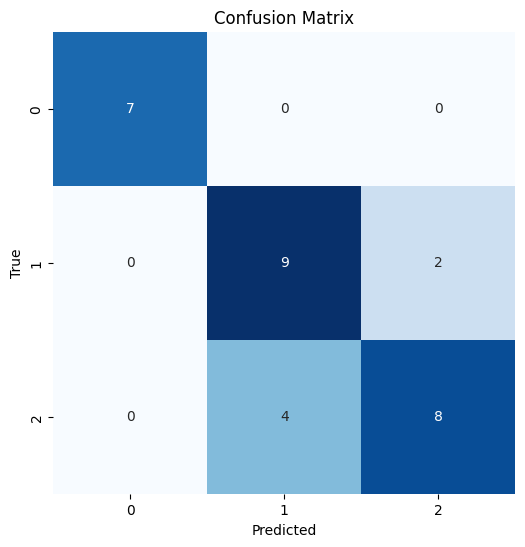

In [25]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Cross-validation Scores: [1.         1.         0.96666667 0.93333333 1.        ]
Mean Accuracy: 0.9800000000000001


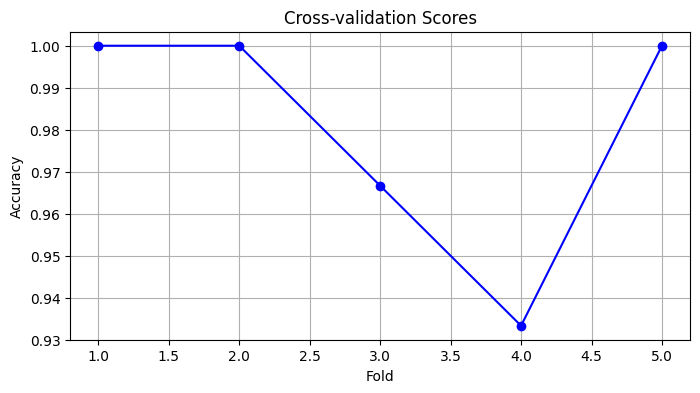

In [26]:
# Perform cross-validation
cv_scores = cross_val_score(lda, X, y, cv=5)

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Visualize cross-validation scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores')
plt.grid(True)
plt.show()

## **Comparing with PCA**

In [27]:
# Apply PCA for comparison
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

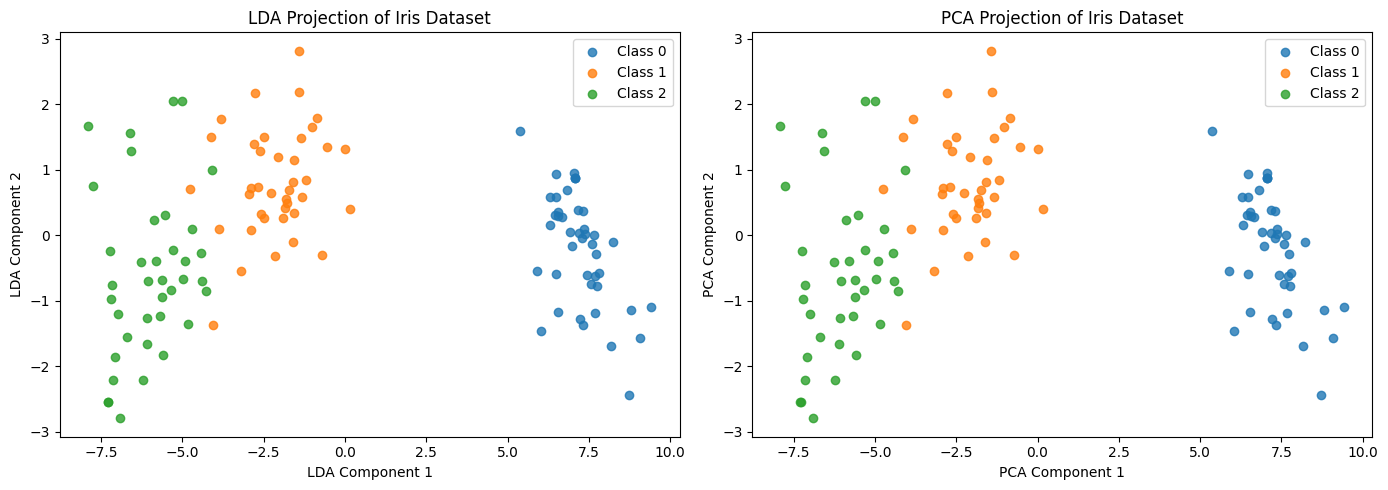

In [28]:
# Create subplots for LDA and PCA visualizations side by side
plt.figure(figsize=(14, 5))

# LDA Visualization
plt.subplot(1, 2, 1)
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1], label=f'Class {label}', alpha=0.8)
plt.title('LDA Projection of Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()

# PCA Visualization
plt.subplot(1, 2, 2)
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Class {label}', alpha=0.8)
plt.title('PCA Projection of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.tight_layout()
plt.show()


PCA and LDA both reduce the dimensionality of the dataset.
PCA focuses on maximizing variance, while LDA focuses on maximizing class separability.
The choice between PCA and LDA depends on the specific goals of the analysis and the nature of the dataset.

Additional Comparison:
PCA may be more suitable for exploratory data analysis or when class labels are not available.
LDA is preferable for supervised learning tasks where class separability is important.

## **Limitations and Assumptions of LDA**

> **Limitations**

Although Linear Discriminant Analysis (LDA) is a powerful dimensionality reduction technique, it has certain limitations, especially in the context of the Iris dataset:

* ***Linear Decision Boundary:*** LDA assumes that the decision boundary between classes is linear. In cases where the relationship between features and classes is nonlinear, LDA may not capture complex patterns effectively.
* ***Assumptions Violation:*** LDA relies on assumptions such as normality of data distribution and equality of covariance matrices across classes. If these assumptions are violated, the performance of LDA may degrade.
* ***Sensitive to Outliers:*** LDA can be sensitive to outliers, as it aims to minimize within-class scatter. Outliers can disproportionately influence the estimation of class means and covariance matrices, leading to suboptimal results.

> **Assumptions**

In the context of the Iris dataset, the assumptions of LDA may not always hold true:

* ***Normality of Data Distribution:*** While LDA assumes that the data within each class is normally distributed, real-world datasets may exhibit non-normal distributions. Deviations from normality can affect the performance of LDA.
* ***Equality of Covariance Matrices:*** LDA assumes that all classes share the same covariance matrix. However, in practice, this assumption may not be met if classes have different variances or correlations between features.

By considering these limitations and assumptions, we can better interpret the results obtained from applying LDA to the Iris dataset and make informed decisions about its suitability for the task at hand.

## **Conclusion**

>  **Key Findings**

Applying Linear Discriminant Analysis (LDA) to the Iris dataset revealed the following key findings:

1. ***Effective Dimensionality Reduction:*** LDA successfully reduced the dataset's dimensionality while preserving essential information, aiding visualization and analysis.
2. ***Improved Class Separability:*** LDA maximized class separability, potentially enhancing subsequent classification algorithms' performance.
3. ***Promising Model Performance:*** The LDA model demonstrated promising performance, as indicated by evaluation metrics and cross-validation scores.

> **Recommendations**

For future research, consider:

1. ***Exploring Nonlinear Techniques:*** Investigate alternative dimensionality reduction techniques to capture nonlinear relationships effectively.
Addressing Imbalanced Data: Handle potential class imbalance and experiment with feature engineering to enhance model performance.
2. ***Ensemble Approaches:*** Explore ensemble methods to further improve classification performance and model robustness.

> **Final Remarks**

In conclusion, LDA offers valuable insights into dimensionality reduction and classification on the Iris dataset. By understanding its limitations and exploring alternative approaches, we can continue to advance our analysis of complex datasets effectively.